# QURAN & NLP 

In [1]:
import pandas as pd
from matplotlib import pyplot as plt


In [2]:
df = pd.read_csv("Quran_English.csv")
df.head()

Name  Surah  Ayat                                              Verse
0  The Opening      1     1  In the name of Allah, the Beneficent, the Merc...
1  The Opening      1     2            Praise be to Allah, Lord of the Worlds,
2  The Opening      1     3                      The Beneficent, the Merciful.
3  The Opening      1     4                      Owner of the Day of Judgment,
4  The Opening      1     5  Thee (alone) we worship; Thee (alone) we ask f...

In [3]:
clean_text = []
text=[]
for index, row in df.iterrows():
    clean_text.append(row['Verse'])
    text.append(row['Name'] + "|" + str(row['Surah'])+"|"+str(row['Ayat'])+"|"+row['Verse'])

In [4]:
len(text)

6236

In [5]:
text[0]

'The Opening|1|1|In the name of Allah, the Beneficent, the Merciful.'

In [6]:
text[1]

'The Opening|1|2|Praise be to Allah, Lord of the Worlds,'

In [7]:
surah = []
ayat = []
curr = 1
for i in range(len(text)):
    if int(text[i].split("|")[1]) != curr:
        if len(ayat)>0:
            surah.append(ayat)
        ayat = []
        curr+=1
    
    ayat.append(clean_text[i])
surah.append(ayat)

In [8]:
surah[0]

['In the name of Allah, the Beneficent, the Merciful.',
 'Praise be to Allah, Lord of the Worlds,',
 'The Beneficent, the Merciful.',
 'Owner of the Day of Judgment,',
 'Thee (alone) we worship; Thee (alone) we ask for help',
 'Show us the straight path,',
 'The path of those whom Thou hast favoured; Not the (path) of those who earn Thine anger nor of those who go astray.']

In [9]:
surah[-1]

['Say: I seek refuge in the Lord of mankind,',
 'The King of mankind,',
 'The God of mankind,',
 'From the evil of the sneaking whisperer,',
 'Who whispereth in the hearts of mankind,',
 'Of the jinn and of mankind.']

In [10]:
quran = ""
for ayats in surah:
    for ayat in ayats:
        quran += ayat +"\n"

In [11]:
len(quran)

829248

In [12]:
quran.split("\n")[0]

'In the name of Allah, the Beneficent, the Merciful.'

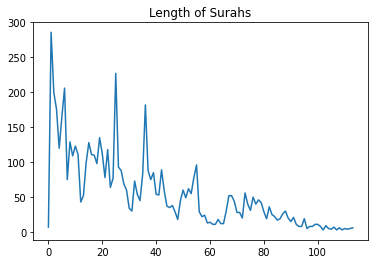

In [13]:
len_of_surahs = []
for i in surah:
    len_of_surahs.append(len(i))

plt.title("Length of Surahs")
plt.plot(len_of_surahs)

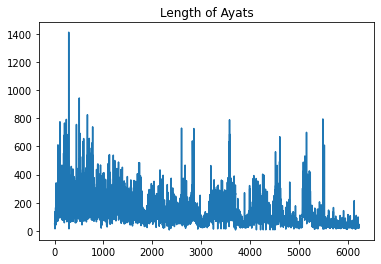

In [14]:
len_of_ayats = []
for i in surah:
    for j in i:
        len_of_ayats.append(len(j))
    
plt.title("Length of Ayats")
plt.plot(len_of_ayats)

# NLP

In [15]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package punkt to C:\Users\Ali Zahid
[nltk_data]     Raja\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to C:\Users\Ali Zahid
[nltk_data]     Raja\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to C:\Users\Ali Zahid
[nltk_data]     Raja\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to C:\Users\Ali Zahid
[nltk_data]     Raja\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [16]:
import nltk
import re
import string
from nltk.corpus import stopwords, brown
from nltk.tokenize import word_tokenize, sent_tokenize, RegexpTokenizer
from nltk.stem import WordNetLemmatizer

In [17]:
lower_case = quran.lower()

In [18]:
def clean_text(lower_case):
    # split text phrases into words
    words  = nltk.word_tokenize(lower_case)
    
    
    # Create a list of all the punctuations we wish to remove
    punctuations = ['.', ',', '/', '!', '?', ';', ':', '(',')', '[',']', '-', '_', '%']
    
    # Remove all the special characters
    punctuations = re.sub(r'\W', ' ', str(lower_case))
    
    stop_words  = stopwords.words('english')
    
    # Getting rid of all the words that contain numbers in them
    w_num = re.sub('\w*\d\w*', '', lower_case).strip()
    
    # remove all single characters
    lower_case = re.sub(r'\s+[a-zA-Z]\s+', ' ', lower_case)
    
    # Substituting multiple spaces with single space
    lower_case = re.sub(r'\s+', ' ', lower_case, flags=re.I)
        
    # Removing non-english characters
    lower_case = re.sub(r'^b\s+', '', lower_case)
    
    # Return keywords which are not in stop words 
    keywords = [word for word in words if not word in stop_words  and word in punctuations and  word in w_num]
    
    return keywords

In [19]:
# Lemmatize the words
wordnet_lemmatizer = WordNetLemmatizer()

lemmatized_word = [wordnet_lemmatizer.lemmatize(word) for word in clean_text(lower_case)]

clean_data = ' '.join(lemmatized_word)
len(clean_data)

448785

In [20]:
df_clean = pd.DataFrame([clean_data])
df_clean.columns = ['script']
df_clean.index = ['quran']
df_clean

script
quran  name allah beneficent merciful praise allah lo...

In [21]:
#  Counting the occurrences of tokens and building a sparse matrix of documents x tokens.
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

corpus = df_clean.script
vect = CountVectorizer(stop_words='english')

# Transforms the data into a bag of words
data_vect = vect.fit_transform(corpus)

In [22]:
feature_names = vect.get_feature_names()
data_vect_feat = pd.DataFrame(data_vect.toarray(), columns=feature_names)
data_vect_feat.index = df_clean.index
data_vect_feat

aaron  abandoned  abase  abased  abasement  abasest  abashed  abasing  \
quran     20          5      4       3          4        1        1        1   

       abate  abated  ...  yieldeth  yonder  yore  young  youth  zachariah  \
quran      1       2  ...         1       3     1      7      4          7   

       zanjabil  zaqqum  zealotry  zeyd  
quran         1       3         2     1  

[1 rows x 5220 columns]

In [23]:
data = data_vect_feat.transpose()
data.shape

(5220, 1)

In [24]:
import matplotlib.pyplot as plt
import seaborn as sn

top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False)
    top_dict[c]= list(zip(top.index, top.values))

In [25]:
top_dict['quran'][:10]

[('allah', 2833),
 ('unto', 1868),
 ('ye', 1861),
 ('lo', 1364),
 ('lord', 1015),
 ('hath', 780),
 ('said', 762),
 ('thou', 760),
 ('say', 706),
 ('thee', 635)]

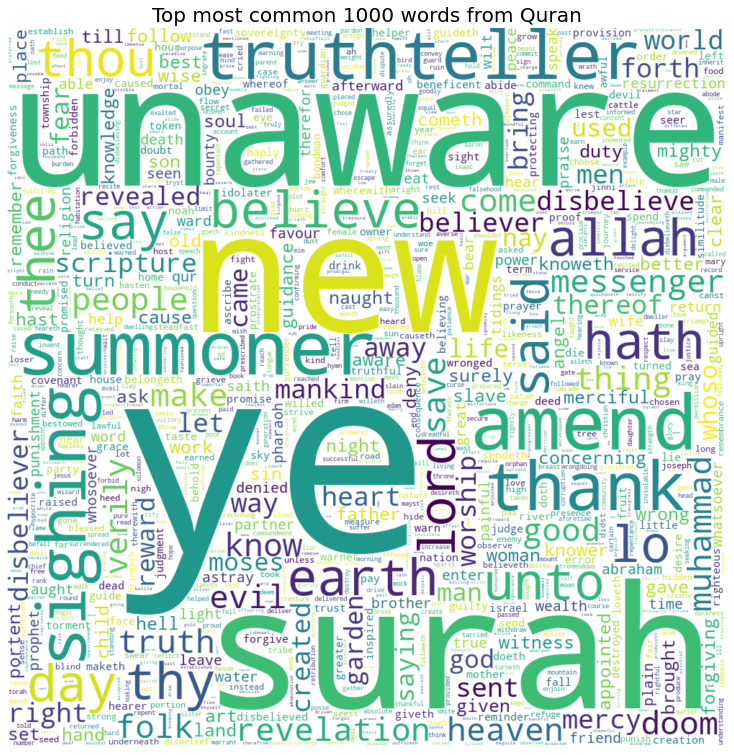

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import nltk


word_count_dict = dict(top_dict['quran'])
popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
wordcloud = WordCloud(stopwords=STOPWORDS,
                          background_color='white',
                          max_words=1000,
                          width=1000,height=1000,
                         ).generate(" ".join(popular_words_nonstop))
plt.imshow(wordcloud, interpolation = 'bilinear')
fig=plt.gcf()
fig.set_size_inches(10,12)
plt.axis('off')
plt.title("Top most common 1000 words from Quran",fontsize=20)
plt.tight_layout(pad=0)
plt.savefig('topmost.png')

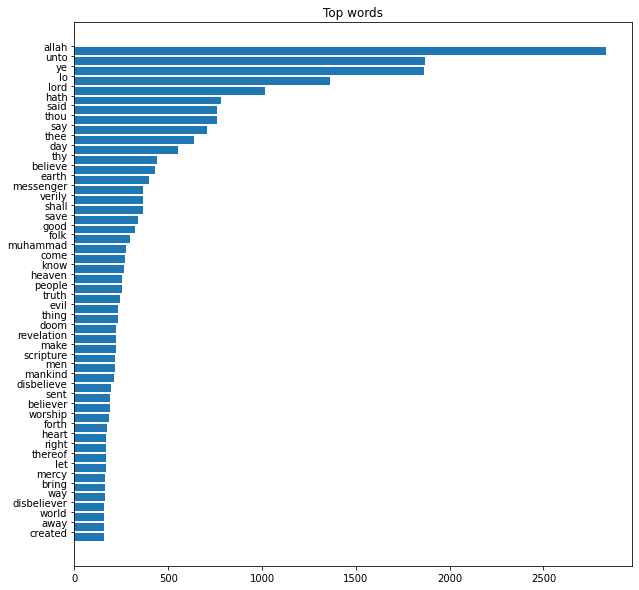

In [27]:
word_count_dict = dict(top_dict['quran'][:50])
popular_words = sorted(word_count_dict, key = word_count_dict.get, reverse = True)
popular_words_nonstop = [w for w in popular_words if w not in stopwords.words("english")]
plt.figure(figsize=(10,10))
plt.barh(range(50), [word_count_dict[w] for w in reversed(popular_words_nonstop[0:50])])
plt.yticks([x + 0.5 for x in range(50)], reversed(popular_words_nonstop[0:50]))
plt.title("Top words")
plt.show()

# Sentiment Analysis

In [28]:
from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to C:\Users\Ali Zahid
[nltk_data]     Raja\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [29]:
sia = SentimentIntensityAnalyzer()
sia.polarity_scores("Islam is the best religion!")

{'neg': 0.0, 'neu': 0.471, 'pos': 0.529, 'compound': 0.6696}

In [30]:
sia.polarity_scores(quran)

{'neg': 0.11, 'neu': 0.768, 'pos': 0.122, 'compound': 1.0}

In [31]:
s_num = 1
for ayats in surah:
    s = ""
    for ayat in ayats:
        #print(ayat.split("|")[-1])
        s += ayat.split("|")[-1] + "\n"
    print(s_num, sia.polarity_scores(s))
    s_num+=1

1 {'neg': 0.046, 'neu': 0.708, 'pos': 0.246, 'compound': 0.9337}
2 {'neg': 0.113, 'neu': 0.781, 'pos': 0.105, 'compound': -0.9993}
3 {'neg': 0.106, 'neu': 0.76, 'pos': 0.133, 'compound': 0.9997}
4 {'neg': 0.121, 'neu': 0.752, 'pos': 0.128, 'compound': 0.9953}
5 {'neg': 0.106, 'neu': 0.782, 'pos': 0.112, 'compound': 0.9807}
6 {'neg': 0.098, 'neu': 0.801, 'pos': 0.101, 'compound': 0.8282}
7 {'neg': 0.121, 'neu': 0.783, 'pos': 0.097, 'compound': -0.9996}
8 {'neg': 0.104, 'neu': 0.784, 'pos': 0.112, 'compound': 0.7279}
9 {'neg': 0.111, 'neu': 0.749, 'pos': 0.14, 'compound': 0.9996}
10 {'neg': 0.091, 'neu': 0.785, 'pos': 0.124, 'compound': 0.9991}
11 {'neg': 0.096, 'neu': 0.761, 'pos': 0.143, 'compound': 0.9997}
12 {'neg': 0.094, 'neu': 0.793, 'pos': 0.113, 'compound': 0.9971}
13 {'neg': 0.103, 'neu': 0.799, 'pos': 0.097, 'compound': -0.9034}
14 {'neg': 0.116, 'neu': 0.771, 'pos': 0.114, 'compound': -0.8784}
15 {'neg': 0.077, 'neu': 0.792, 'pos': 0.131, 'compound': 0.9982}
16 {'neg': 0.091,

In [32]:
from collections import defaultdict
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

In [33]:
blob = TextBlob(clean_data)
blob.sentiment

Sentiment(polarity=0.10367308415563607, subjectivity=0.5703490640281798)

# TEXT SUMMARY

### Summary of Quran

In [34]:
import heapq

In [35]:
def summarise(text):
    sentence_list = nltk.sent_tokenize(text)
    stopwords = nltk.corpus.stopwords.words('english')
    word_frequencies = {}
    for word in nltk.word_tokenize(text):
        if word not in stopwords:
            if word not in word_frequencies.keys():
                word_frequencies[word] = 1
            else:
                word_frequencies[word] += 1

    maximum_frequncy = max(word_frequencies.values())
    for word in word_frequencies.keys():
        word_frequencies[word] = (word_frequencies[word]/maximum_frequncy)

    sentence_scores = {}
    for sent in sentence_list:
        for word in nltk.word_tokenize(sent.lower()):
            if word in word_frequencies.keys():
                if len(sent.split(' ')) < 30:
                    if sent not in sentence_scores.keys():
                        sentence_scores[sent] = word_frequencies[word]
                    else:
                        sentence_scores[sent] += word_frequencies[word]


    summary_sentences = heapq.nlargest(7, sentence_scores, key=sentence_scores.get)
    summary = ' '.join(summary_sentences)
    return summary

In [36]:
summarise(quran)

'Lo! Which is it, of the favours of your Lord, that ye deny ? Allah is Forgiving, Merciful. O ye who believe! Allah is Knower, Wise. Allah is Hearer, Knower. And lo!'

### Summary of Surahs

In [37]:
s_num = 1
for ayats in surah:
    s = ""
    for ayat in ayats:
        #print(ayat.split("|")[-1])
        s += ayat.split("|")[-1] + "\n"
    summary = summarise(s)
    if len(summary) < 5:
        print("SURAH NUMBER:",s_num, "SURAH:", s)
    else:
        print("SURAH NUMBER:",s_num, "SUMMARY:", summary)
    print()
    s_num+=1

SURAH NUMBER: 1 SUMMARY: Praise be to Allah, Lord of the Worlds,
The Beneficent, the Merciful. In the name of Allah, the Beneficent, the Merciful.

SURAH NUMBER: 2 SUMMARY: Allah is Forgiving, Merciful. Lo! Say (unto them, O Muhammad): Nay, but (we follow) the religion of Abraham, the upright, and he was not of the idolaters. So turn thy face toward the Inviolable Place of Worship, and ye (O Muslims), wheresoever ye may be, turn your faces (when ye pray) toward it. And Moses came unto you with clear proofs (of Allah’s Sovereignty), yet, while he was away, ye chose the calf (for worship) and ye were wrong-doers. O ye who believe! Allah is Hearer, Knower.

SURAH NUMBER: 3 SUMMARY: Lo! Nay, but if ye persevere, and keep from evil, and (the enemy) attack you suddenly, your Lord will help you with five thousand angels sweeping on. When ye climbed (the hill) and paid no heed to anyone, while the messenger, in your rear, was calling you (to fight). Allah is Forgiving, Merciful. Say (unto them

SURAH NUMBER: 19 SUMMARY: And, by thy Lord, verily We shall assemble them and the devils, then We shall bring them, crouching, around hell. Lo! And drive the guilty unto hell, a weary herd,
They will have no power of intercession, save him who hath made a covenant with his Lord. We, only We, inherit the earth and all who are thereon, and unto Us they are returned. And We shall inherit from him that whereof he spake, and he will come unto Us, alone (without his wealth and children). And we gave him wisdom when a child,
And compassion from Our presence, and purity; and he was devout,
And dutiful toward his parents. And make him, my Lord, acceptable (unto Thee).

SURAH NUMBER: 20 SUMMARY: Lo! I, even I, am thy Lord, So take off thy shoes, for lo! Then camest thou (hither) by (My) providence, O Moses,
And I have attached thee to Myself. But whoso cometh unto Him a believer, having done good works, for such are the high stations;
Gardens of Eden underneath which rivers flow, wherein they wi

SURAH NUMBER: 39 SUMMARY: Turn unto your Lord repentant, and surrender unto Him, before there come unto you the doom, when ye cannot be helped. But those who keep their duty to their Lord, for them are lofty halls with lofty halls above them, built (for them), beneath which rivers flow. (But now the answer will be): Nay, for My revelations came unto thee, but thou didst deny them and wast scornful and wast among the disbelievers. Allah receiveth (men’s) souls at the time of their death, and that (soul) which dieth not (yet) in its sleep. And when some hurt toucheth man, he crieth unto his Lord, turning unto Him (repentant). And when Allah alone is mentioned, the hearts of those who believe not in the Hereafter are repelled, and when those (whom they worship) beside Him are mentioned, behold! We have revealed the Scripture unto thee (Muhammad) with truth; so worship Allah, making religion pure for Him (only).

SURAH NUMBER: 40 SUMMARY: The revelation of the Scripture is from Allah, the 

SURAH NUMBER: 66 SUMMARY: Allah, even He, is his Protecting Friend, and Gabriel and the righteous among the believers; and furthermore the angels are his helpers. Allah hath made lawful for you (Muslims) absolution from your oaths (of such a kind), and Allah is your Protector. He said: The Knower, the Aware hath told me. Hell will be their home, a hapless journey’s end. And she put faith in the words of her Lord and His scriptures, and was of the obedient. Why bannest thou that which Allah hath made lawful for thee, seeking to please thy wives ? Strive against the disbelievers and the hypocrites, and be stern with them.

SURAH NUMBER: 67 SUMMARY: They say: Yea, verily, a warner came unto us; but we denied and said: Allah hath naught revealed; ye are in naught but a great error. Say (unto them, O Muhammad): He it is who gave you being, and hath assigned unto you ears and eyes and hearts. And they say: When (will) this promise (be fulfilled), if ye are truthful ? Say: Have ye thought: If

SURAH NUMBER: 102 SUMMARY: Nay, but ye will come to know! Then, on that day, ye will be asked concerning pleasure. Nay, would that ye knew (now) with a sure knowledge! Aye, ye will behold it with sure vision. Rivalry in worldly increase distracteth you
Until ye come to the graves. For ye will behold hell-fire.

SURAH NUMBER: 103 SUMMARY: man is a state of loss,
Save those who believe and do good works, and exhort one another to truth and exhort one another to endurance. By the declining day,
Lo!

SURAH NUMBER: 104 SUMMARY: (It is) the fire of Allah, kindled,
Which leapeth up over the hearts (of men). Woe unto every slandering traducer,
Who hath gathered wealth (of this world) and arranged it. Nay, but verily he will be flung to the Consuming One. Ah, what will convey unto thee what the Consuming One is! He thinketh that his wealth will render him immortal. it is closed in on them
In outstretched columns. Lo!

SURAH NUMBER: 105 SUMMARY: Hast thou not seen how thy Lord dealt with the own

# Search Engine 

In [38]:
import tensorflow as tf
import tensorflow_hub as hub
from tqdm import tqdm
from nltk.corpus import wordnet as wn
from nltk import pos_tag
from nltk.corpus import stopwords
from sklearn.metrics.pairwise import linear_kernel

In [39]:
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Ali Zahid Raja\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [40]:
df["useful_info"] =df.Verse.replace(to_replace='[!"#$%&\'()*+,/:;<=>?@[\\]^_`{|}~]',value=' ',regex=True) 
#remove punctuation
df.useful_info =df.useful_info.replace(to_replace='-',value=' ',regex=True)
df.useful_info =df.useful_info.replace(to_replace='\s+',value=' ',regex=True)    #remove new line
df.useful_info =df.useful_info.replace(to_replace='  ',value='',regex=True)   #remove double white space  
df.useful_info =df.useful_info.replace(to_replace="'",value='',regex=True)   


df.useful_info = df.useful_info.apply(lambda x:x.strip().lower())  # Ltrim and Rtrim of whitespace

In [41]:
df["info_tokenize"]= [word_tokenize(entry) for entry in tqdm(df["useful_info"])] 

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6236/6236 [00:00<00:00, 7008.00it/s]


In [42]:
def wordLemmatizer(data):
    tag_map = defaultdict(lambda : wn.NOUN)
    tag_map['J'] = wn.ADJ
    tag_map['V'] = wn.VERB
    tag_map['R'] = wn.ADV
    clean_k =pd.DataFrame()
    word_Lemmatized = WordNetLemmatizer()
    for index,entry in tqdm(enumerate(data)):
        
        Final_words = []
        for word, tag in pos_tag(entry):
            if len(word)>1 and word not in stopwords.words('english') and word.isalpha():
                word_Final = word_Lemmatized.lemmatize(word,tag_map[tag[0]])
                Final_words.append(word_Final)
        
        clean_k.loc[index,'Keyword_final'] = str(Final_words)
    clean_k=clean_k.replace(to_replace ="'", value = '', regex = True)
    clean_k=clean_k.replace(to_replace =" ", value = '', regex = True)
    clean_k=clean_k.replace(to_replace ="\[", value = '', regex = True)
    clean_k=clean_k.replace(to_replace ='\]', value = '', regex = True)
    return clean_k

In [43]:
df["Keyword_final"] = wordLemmatizer(df['info_tokenize'])
df.head()

6236it [00:51, 120.89it/s]


Name  Surah  Ayat  \
0  The Opening      1     1   
1  The Opening      1     2   
2  The Opening      1     3   
3  The Opening      1     4   
4  The Opening      1     5   

                                               Verse  \
0  In the name of Allah, the Beneficent, the Merc...   
1            Praise be to Allah, Lord of the Worlds,   
2                      The Beneficent, the Merciful.   
3                      Owner of the Day of Judgment,   
4  Thee (alone) we worship; Thee (alone) we ask f...   

                                         useful_info  \
0  in the name of allah the beneficent the merciful.   
1              praise be to allah lord of the worlds   
2                       the beneficent the merciful.   
3                       owner of the day of judgment   
4   thee alone we worship thee alone we ask for help   

                                       info_tokenize  \
0  [in, the, name, of, allah, the, beneficent, th...   
1     [praise, be, to, allah, lord, of, the, worlds]   
2                [the, beneficent, the, merciful, .]   
3                [owner, of, the, day, of, judgment]   
4  [thee, alone, we, worship, thee, alone, we, as...   

                            Keyword_final  
0          name,allah,beneficent,merciful  
1                 praise,allah,lord,world  
2                     beneficent,merciful  
3                      owner,day,judgment  
4  thee,alone,worship,thee,alone,ask,help

In [44]:
#Using Google Universal Sentence Encoder
#USEmodel = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")
USEmodel = hub.load("model/")

In [45]:
train = USEmodel(df.Keyword_final)
train_m = tf.train.Checkpoint(v=tf.Variable(train))

train_m.f = tf.function( lambda  x: exported_m.v * x, input_signature=[tf.TensorSpec(shape=None, dtype=tf.float32)])

model = train_m.v.numpy()

In [46]:
model.shape

(6236, 512)

In [47]:
def SearchDocument(query,size=10):
    q = [query]
    Q_Train = USEmodel(q)
    
    linear_similarities = linear_kernel(Q_Train, model).flatten() 
    
    Top_index_doc = linear_similarities.argsort()[:-(size+1):-1]
    #print(Top_index_doc)
    linear_similarities.sort()
    find = pd.DataFrame()
    for i,index in enumerate(Top_index_doc):
        find.loc[i,'Name'] = str(df['Name'][index])
        find.loc[i,'Surah'] = str(df['Surah'][index])
        find.loc[i,'Ayat'] = str(df['Ayat'][index])
        find.loc[i,'Verse'] = df['Verse'][index] 
        
    for j,simScore in enumerate(linear_similarities[:-(size+1):-1]):
        find.loc[j,'Score'] = simScore
        
    if size==1:
        print("Query: ",query,".  Surah:", find.loc[0,'Name'], " Number:", find.loc[0,'Surah'], 
              " Ayat:", find.loc[0,'Ayat'],"\n")
    else:
        return find

In [48]:
SearchDocument("Happiness")

Name Surah Ayat  \
0                    The Cow     2  274   
1               The Believer    40   25   
2         Mutual Disillusion    64   12   
3                    Al-Hijr    15   88   
4                    The Ant    27   26   
5         She That Disputeth    58    4   
6                    The Bee    16  125   
7                    Divorce    65    8   
8  The Wind-Curved Sandhills    46   10   
9                 Repentance     9   52   

                                               Verse     Score  
0  Those who spend their wealth by night and day,...  0.432426  
1  And when he brought them the Truth from Our pr...  0.414953  
2  Obey Allah and obey His messenger; but if ye t...  0.400636  
3  Strain not thine eyes toward that which We cau...  0.396058  
4  Allah; there is no God save Him, the Lord of t...  0.395410  
5  And he who findeth not (the wherewithal), let ...  0.389824  
6  Call unto the way of thy Lord with wisdom and ...  0.384699  
7  And how many a community revolted against the ...  0.383884  
8  Bethink you: If it is from Allah and ye disbel...  0.383831  
9  Say: Can ye await for us aught save one of two...  0.382788

In [49]:
SearchDocument("What reward do I get?")

Name Surah Ayat  \
0  The Family of 'Imrân     3  181   
1            The Romans    30   27   
2             The Clans    33   31   
3                Yâ Sîn    36   65   
4            Repentance     9   34   
5  The Family of 'Imrân     3  189   
6            The Angels    35   20   
7             The Poets    26  133   
8              The Dawn    89   18   
9            The Spider    29   22   

                                               Verse     Score  
0  Verily Allah heard the saying of those who sai...  0.214258  
1  He it is Who produceth creation, then reproduc...  0.209129  
2  And whosoever of you is submissive unto Allah ...  0.205419  
3  This day We seal up their mouths, and their ha...  0.204139  
4  O ye who believe! Lo! many of the (Jewish) rab...  0.201521  
5  Unto Allah belongeth the Sovereignty of the he...  0.197649  
6             Nor is darkness (tantamount to) light;  0.196091  
7               Hath aided you with cattle and sons.  0.194666  
8           And urge not on the feeding of the poor.  0.193950  
9  Ye cannot escape (from Him) in the earth or in...  0.193256

In [50]:
SearchDocument("What is the punishment for sin?")

Name Surah Ayat  \
0          Al-Hijr    15   58   
1  The Cloaked One    74   43   
2          Counsel    42   12   
3          The Bee    16  125   
4          The Cow     2  198   
5    Spoils of War     8   47   
6    The Believers    23  113   
7    Spoils of War     8   44   
8          The Bee    16   71   
9          The Cow     2   53   

                                               Verse     Score  
0   They said: We have been sent unto a guilty folk,  0.190947  
1  They will answer: We were not of those who prayed  0.187375  
2  His are the keys of the heavens and the earth....  0.186272  
3  Call unto the way of thy Lord with wisdom and ...  0.180066  
4  It is no sin for you that ye seek the bounty o...  0.174371  
5  Be not as those who came forth from their dwel...  0.173835  
6  They will say: We tarried by a day or part of ...  0.173493  
7  And when He made you (Muslims), when ye met (t...  0.168937  
8  And Allah hath favoured some of you above othe...  0.168600  
9  And when We gave unto Moses the Scripture and ...  0.163528